In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#실행 후 런타임->런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,289 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

# 1. 텍스트 화일과 이미지 화일 불러오기

##### - 세종대왕.txt
##### - maskHeart.jpg


In [2]:
# 텍스트 화일과  마스트 화일 가져오기
from google.colab import files
files.upload()

Saving heart_mask.jpg to heart_mask.jpg
Saving 세종대왕.txt to 세종대왕.txt


{'heart_mask.jpg': b'\xff\xd8\xff\xe1\x00\x18Exif\x00\x00II*\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00\x1e\x00\x00\xff\xe1\x03-http://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 7.0-c000 79.dabacbb, 2021/04/14-00:39:44        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmp="http://ns.adobe.com/xap/1.0/" xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/" xmlns:stRef="http://ns.adobe.com/xap/1.0/sType/ResourceRef#" xmp:CreatorTool="Adobe Photoshop 22.5 (Windows)" xmpMM:InstanceID="xmp.iid:60A63FE919C311EC9C2CF13A0EC571A4" xmpMM:DocumentID="xmp.did:60A63FEA19C311EC9C2CF13A0EC571A4"> <xmpMM:DerivedFrom stRef:instanceID="xmp.iid:60A63FE719C311EC9C2CF13A0EC571A4" stRef:documentID="xmp.did:60A63FE819C311EC9C2CF13A0EC571A4"/> </rdf:Description> </rdf:RDF> </x:xmpmeta> <?xpacket 

# 2. 필요한 라이브러리들 로딩하기

In [4]:
%%shell
pip install koNLpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 3.1 MB/s 
     |████████████████████████████████| 453 kB 55.9 MB/s 


In [3]:
# 워드 클라우드 생성에 필요한 라이브러리들(wordcloud, STOPWORDS, matplotlib)
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

#마스크 이미지 처리를 위해 필요한 라이브러리들(Image, numpy)
from PIL import Image
import numpy as np

# 3. 관련 화일들 open 하고 저장하기

In [5]:
# 워드 클라우드 생성을 위한 텍스트 화일을 열어 읽어오기
# open('텍스트 화일명', '읽기모드',encoding='인코딩방식')
# 파일의 내용 읽기 : 변수명.read()
f = open('./세종대왕.txt', 'r', encoding='UTF8')
text = f.read()
text

' 세종은 여기로 연결됩니다. 다른 뜻에 대해서는 세종 (동음이의) 문서를 참고하십시오.\nPicto infobox prétendant à un trône.png\t세종\n世宗\n광화문 광장의 세종대왕 동상\n광화문 광장의 세종대왕 동상\n지위\n조선의 왕세자\n재위\t1418년 7월 6일 ~ 9월 9일 (양력)\n전임\t왕세자 제 (양녕대군)\n후임\t왕세자 향 (문종)\n조선의 제4대 국왕\n재위\t1418년 9월 9일 ~ 1450년 3월 30일 (양력)\n즉위식\t경복궁 근정전\n전임\t태종\n후임\t문종\n이름\n휘\t이도(李裪)\n묘호\t세종(世宗)\n군호\t충녕대군(忠寧大君)\n시호\t장헌영문예무인성명효대왕\n(莊憲英文睿武仁聖明孝大王)\n능호\t영릉(英陵)\n경기도 여주시 능서면 왕대리 901-3\n신상정보\n출생일\t1397년 5월 15일 (양력)\n출생지\t조선 한성부 준수방\n사망일\t1450년 3월 30일 (52세) (양력)\n사망지\t조선 한성부 영응대군 사저\n부친\t태종\n모친\t원경왕후 민씨\n배우자\t소헌왕후 심씨\n자녀\t18남 4녀 (18남 7녀)\n세종(世宗, 1397년 5월 7일[1] ~ 1450년 3월 30일)은 조선의 제4대 국왕(재위 : 1418년 9월 9일 ~ 1450년 3월 30일)이다. 세종의 업적에 대한 존경의 의미를 담아 세종대왕(世宗大王)으로 일컬어진다.\n\n\n목차\n1\t개요\n2\t생애\n2.1\t왕자 시절\n2.1.1\t탄생과 봉작\n2.1.2\t양녕대군과의 갈등\n2.1.3\t세자 책봉과 즉위\n3\t치세\n3.1\t대외 정책\n3.1.1\t공녀와 금은 조공 중지\n3.1.2\t대마도 정벌\n3.1.3\t4군 6진 개척\n3.2\t훈민정음 창제\n3.3\t재상 등용과 국정 분담\n3.3.1\t의정부 서사제 실시\n3.4\t과학의 발전\n3.4.1\t천문과 역법\n3.4.2\t금속활자와 인쇄술\n3.4.3\t도량형 통일 · 총통제작\n3.5\t문물의 발전\n3.5.1\t음악 정비 · 편경 제작\n3.5

In [6]:
# 마스크 이미지 화일 읽어와서 array로 변경하기
#변수명.array(Image.open('이미지화일명'))
maskHeart = np.array(Image.open('heart_mask.jpg'))
maskHeart

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

#4.자연어 처리하기

In [7]:
# 한글 자연어처리를 위한 konlpy 라이브러리 로딩
# Twitter(Okt)를 이용한 형태소 분석
from konlpy.tag import Okt

# Okt(Twitter) 형태소 분석을 위한 객체 생성
t = Okt()

# 문자열에서 명사만 추출하기
# 객체명.nouns(변수명)
명사 = t.nouns(text)
명사

['세종',
 '여기',
 '연결',
 '다른',
 '뜻',
 '대해',
 '세종',
 '동음',
 '이의',
 '문서',
 '참고',
 '세종',
 '광화문',
 '광장',
 '세종대왕',
 '동상',
 '광화문',
 '광장',
 '세종대왕',
 '동상',
 '지위',
 '조선',
 '왕세자',
 '재위',
 '양력',
 '전임',
 '왕세자',
 '제',
 '양녕대군',
 '후임',
 '왕세자',
 '향',
 '문종',
 '조선',
 '제',
 '국왕',
 '재위',
 '양력',
 '즉위',
 '경복궁',
 '근정전',
 '전임',
 '태종',
 '후임',
 '문종',
 '이름',
 '휘',
 '이도',
 '묘호',
 '세종',
 '군호',
 '충녕대군',
 '시호',
 '장',
 '무인',
 '명효대왕',
 '능호',
 '영릉',
 '경기도',
 '여주시',
 '능서면',
 '왕',
 '대리',
 '신상',
 '정보',
 '출생일',
 '양력',
 '출생지',
 '조선',
 '한성부',
 '준수',
 '방',
 '사망일',
 '세',
 '양력',
 '사망',
 '조선',
 '한성부',
 '영응대군',
 '저',
 '부친',
 '태종',
 '모친',
 '원경왕후',
 '민씨',
 '배우자',
 '소헌왕후',
 '심씨',
 '자녀',
 '남',
 '녀',
 '남',
 '녀',
 '세종',
 '은',
 '조선',
 '제',
 '국왕',
 '재위',
 '세종',
 '업적',
 '대한',
 '존경',
 '의미',
 '세종대왕',
 '컬',
 '목차',
 '개요',
 '생애',
 '왕자',
 '시절',
 '탄생',
 '봉작',
 '양녕대군',
 '갈등',
 '세자',
 '책봉',
 '즉위',
 '대외',
 '정책',
 '공녀',
 '금은',
 '조공',
 '중지',
 '대마도',
 '정벌',
 '군',
 '진',
 '개척',
 '훈민정음',
 '창제',
 '재상',
 '등용',
 '국정',
 '분담',
 '의정부',
 '사제',
 '실시',
 '과학',
 '발전',

In [9]:
#워드클라우드에서 사용한 명사들을 문자열(문장)로 변환하기
#간단한 프로그램 필요
strData = ' '.join(명사)
strData

'세종 여기 연결 다른 뜻 대해 세종 동음 이의 문서 참고 세종 광화문 광장 세종대왕 동상 광화문 광장 세종대왕 동상 지위 조선 왕세자 재위 양력 전임 왕세자 제 양녕대군 후임 왕세자 향 문종 조선 제 국왕 재위 양력 즉위 경복궁 근정전 전임 태종 후임 문종 이름 휘 이도 묘호 세종 군호 충녕대군 시호 장 무인 명효대왕 능호 영릉 경기도 여주시 능서면 왕 대리 신상 정보 출생일 양력 출생지 조선 한성부 준수 방 사망일 세 양력 사망 조선 한성부 영응대군 저 부친 태종 모친 원경왕후 민씨 배우자 소헌왕후 심씨 자녀 남 녀 남 녀 세종 은 조선 제 국왕 재위 세종 업적 대한 존경 의미 세종대왕 컬 목차 개요 생애 왕자 시절 탄생 봉작 양녕대군 갈등 세자 책봉 즉위 대외 정책 공녀 금은 조공 중지 대마도 정벌 군 진 개척 훈민정음 창제 재상 등용 국정 분담 의정부 사제 실시 과학 발전 천문 역법 금속활자 인쇄 술 도량형 통일 총통 제작 문물 발전 음악 정비 편경 제작 서적 편찬 문물 정비 법전 정비 형옥 제도 확립 공법 제정 애민 정책 불교 귀의 건강 악화 최후 묘호 시호 능묘 기타 일화 중첩 혼인 관계 가족 관계 세종 직계 조상 부모 왕비 후궁 왕자 왕녀 세종 등장 작품 드라마 영화 게임 세종 유래 것 건축물 지역 도로명 단체 상 구축함 화폐 도안 기념일 소행성 프로젝트 보기 참고 문헌 외부 링크 각주 주해 개요 조선 제 국왕 태종 원경왕후 아들 형 양녕대군 폐 세자 세자 책봉 태종 양위 즉위 세종 과학 기술 예술 문화 국방 등 분야 업적 백성 농사 관 책 글 이해 모습 보고 누구 수 효율 과학 문자 체계 훈민정음 창제 훈민정음 언문 불리 왕실 민간 사용 세기 주시경 한글 발전 오늘날 대한민국 공식 문자 로서 널리 과학 기술 두루 관심 혼 앙부일구 자격루 측우기 등 발명 폭 지원 신분 장영실 최해산 등 학자 후원 국방 이종무 파견 왜구 토벌 대마도 정벌 이징옥 최윤덕 김종서 등 북방 평안도 함길도 출몰 여진족 국경 밖 군 진 개척 압록강 두만강 유역 국경 확장 백

# 5. 워드 클라우드 생성하기

In [25]:
from matplotlib.cm import ma
#한글 폰트 경로 저장하기 
#왼쪽의 폴더에서 /usr/share/fonts/truetype/nanum 안에 있는 ttf 파일명의 경로 가져오기
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

#불용어로 처리한 단어들 추가하기
#STOPWORDS.union({'불용어로 처리할 단어들'})
s_words = STOPWORDS.union({
    '이', '등', '의', '를', '것', '그', '이후', '도', '후', '모두', '또한'
})

#워드 클라우드 생성하기
#WordCloud(속성들).generator(문자열변수명)
#속성들 : width, height, mask, stopwords, font_path, background_color...
wordcloud = WordCloud(
    font_path=path, 
    stopwords=s_words, 
    mask=maskHeart,
    background_color='white'
  ).generate(strData)

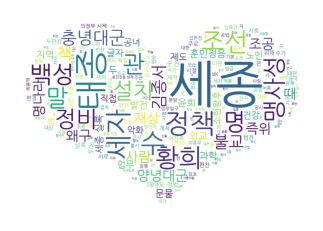

In [26]:
#이미지 크기 설정
#figure(figsize=(x,y))

#워드클라우드 이미지 생성
#imshow(생성된 워드클라우드 변수명)
plt.imshow(wordcloud)

#x, y축 눈금 숨기기
plt.axis('off')
plt.show()